In [2]:
# ---- CROP RECOMMENDATION FUNCTION ----
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Create DataFrame with same feature names
    input_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                              columns=X.columns)

    # Scale input using the same scaler
    input_scaled = scaler.transform(input_data)

    # Predict crop
    prediction = model.predict(input_scaled)
    crop = encoder.inverse_transform(prediction)[0]

    return crop

# ---- Example Usage ----
sample_crop = recommend_crop(90, 40, 40, 25, 80, 6.5, 200)
print("Recommended Crop:", sample_crop)


Recommended Crop: rice


Showing conditions for rice (100 samples)


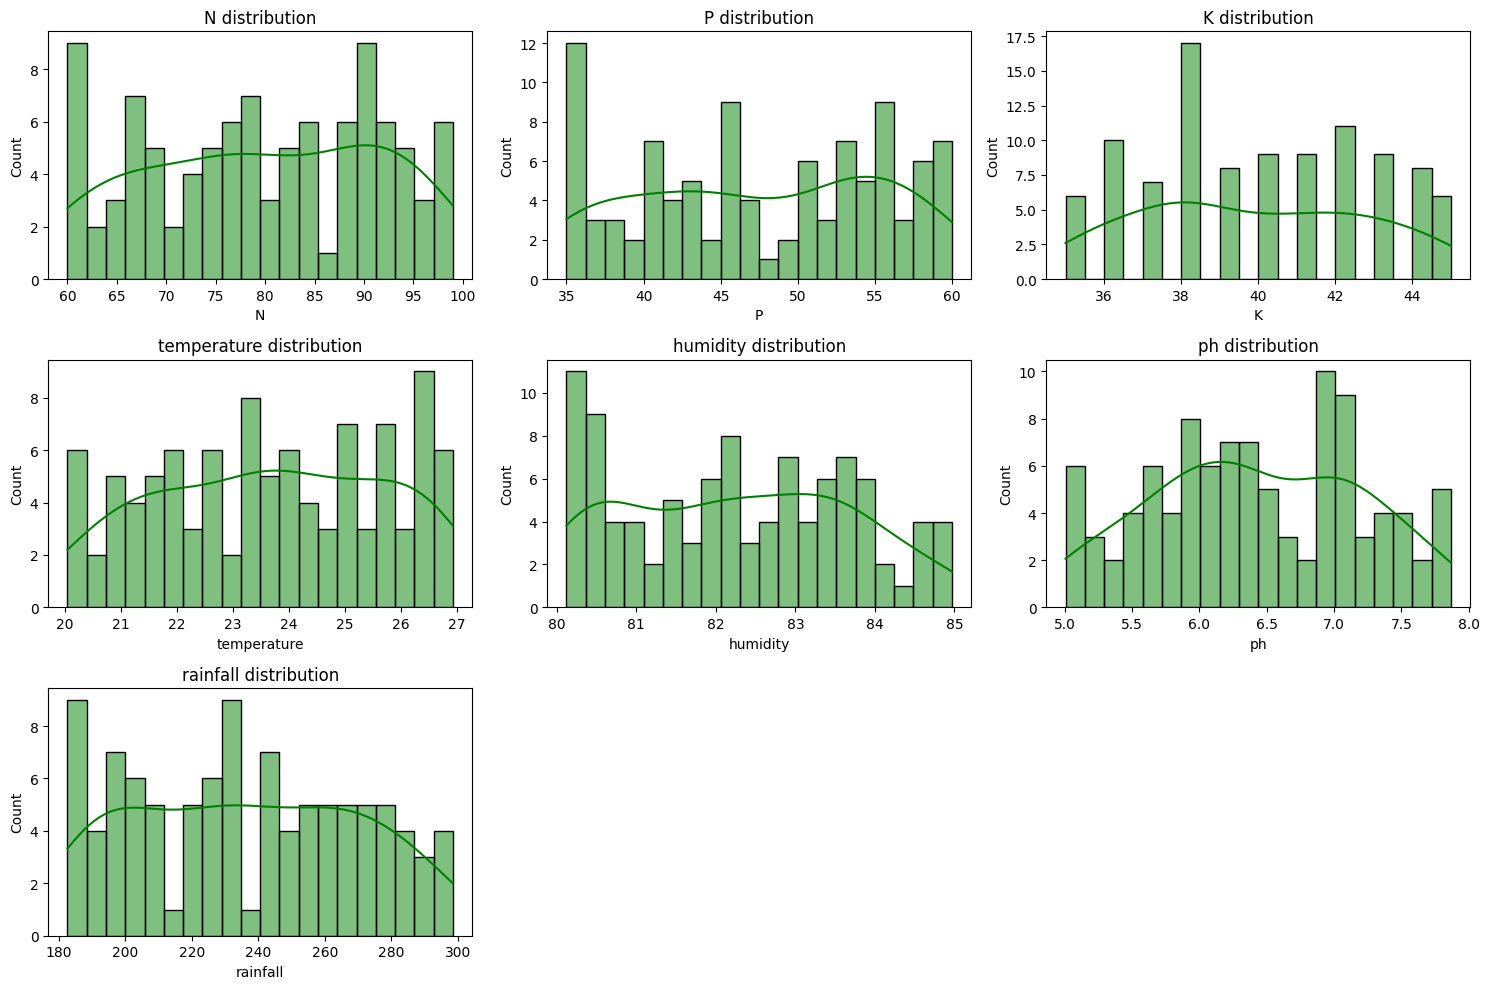


Average growing conditions:
N               79.890000
P               47.580000
K               39.870000
temperature     23.689332
humidity        82.272822
ph               6.425471
rainfall       236.181114
dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Crop_recommendation.csv")

# Function to visualize crop growth conditions
def visualize_crop(crop_name):
    # Filter data for the selected crop
    crop_data = df[df["label"] == crop_name]

    if crop_data.empty:
        print(f"No data found for {crop_name}")
        return

    print(f"Showing conditions for {crop_name} ({len(crop_data)} samples)")

    # Plot feature distributions
    features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(crop_data[feature], kde=True, bins=20, color="green")
        plt.title(f"{feature} distribution")
        plt.xlabel(feature)
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

    # Show average values (like "growth profile")
    avg_values = crop_data[features].mean()
    print("\nAverage growing conditions:")
    print(avg_values)

# ---- Example Usage ----
visualize_crop("rice")


/tmp/ipython-input-151280147.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_crops['Month'] = (major_crops.index % 12) + 1


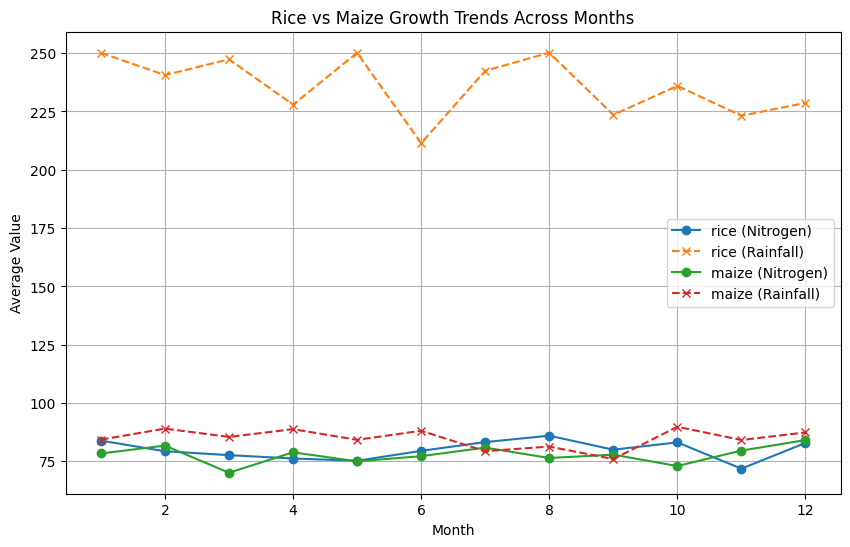

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Crop_recommendation.csv")

# Filter for Rice and Maize
major_crops = df[df['label'].isin(['rice', 'maize'])]

# Add a dummy "Month" column (since dataset doesn’t have months, we simulate distribution)
# We'll divide the rows equally into 12 months for visualization purposes
major_crops['Month'] = (major_crops.index % 12) + 1

# Group by Month and Crop to get average growth conditions
monthly_avg = major_crops.groupby(['Month', 'label']).mean().reset_index()

# Plot growth based on Nitrogen levels (you can also choose temperature, rainfall, etc.)
plt.figure(figsize=(10,6))
for crop in ['rice', 'maize']:
    crop_data = monthly_avg[monthly_avg['label'] == crop]
    plt.plot(crop_data['Month'], crop_data['N'], marker='o', label=f"{crop} (Nitrogen)")
    plt.plot(crop_data['Month'], crop_data['rainfall'], marker='x', linestyle='--', label=f"{crop} (Rainfall)")

plt.title("Rice vs Maize Growth Trends Across Months")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()


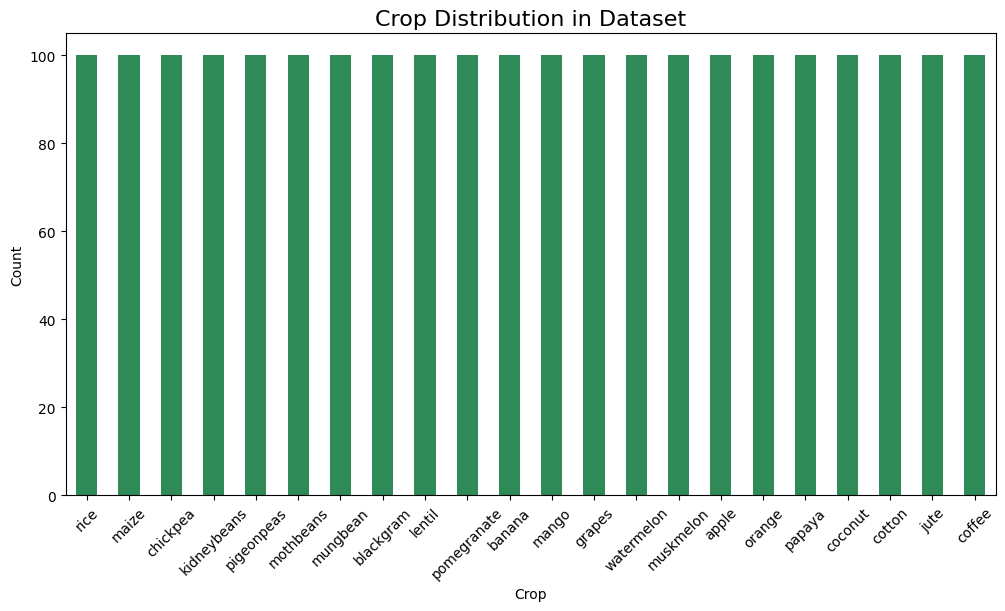

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
df['label'].value_counts().plot(kind='bar', color='seagreen')
plt.title("Crop Distribution in Dataset", fontsize=16)
plt.xlabel("Crop")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


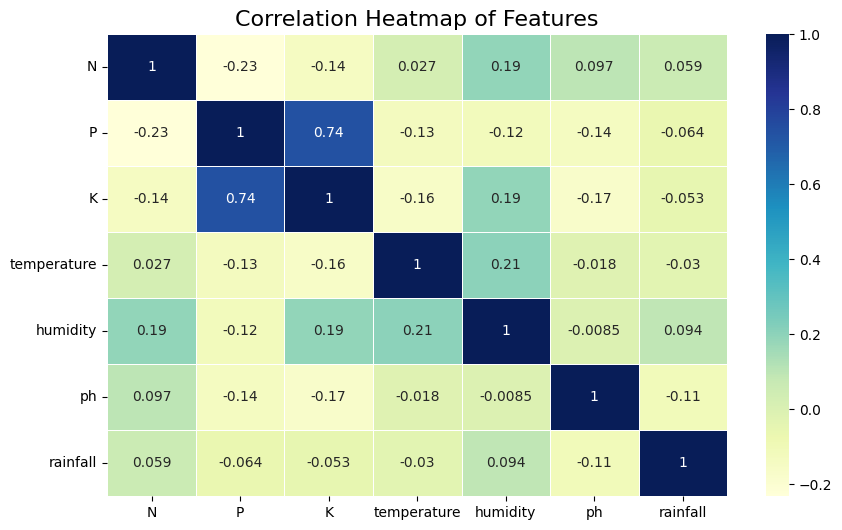

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


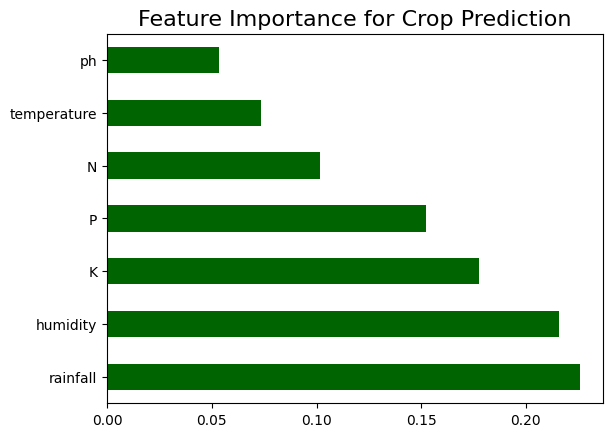

In [13]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('label', axis=1)
y = df['label']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh', color="darkgreen")
plt.title("Feature Importance for Crop Prediction", fontsize=16)
plt.show()


/tmp/ipython-input-4220644833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=list(models.values()), palette="Greens_r")


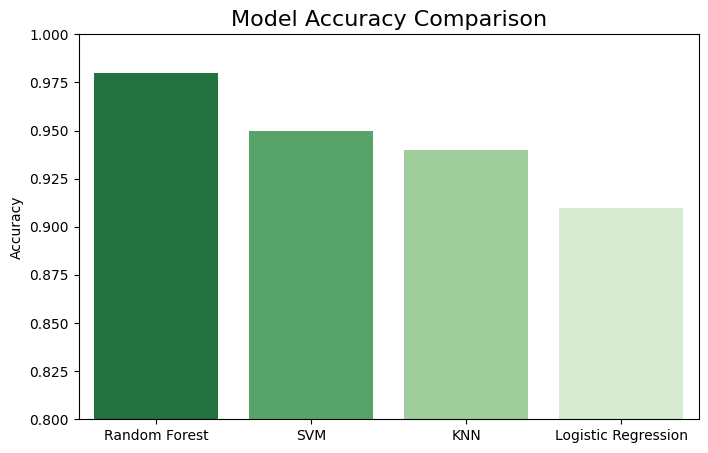

In [14]:
models = {'Random Forest': 0.98, 'SVM': 0.95, 'KNN': 0.94, 'Logistic Regression': 0.91}

plt.figure(figsize=(8,5))
sns.barplot(x=list(models.keys()), y=list(models.values()), palette="Greens_r")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()


In [2]:
pip install scikit-learn


     -------------------------------------- 11.2/11.2 MB 421.3 kB/s eta 0:00:00
     ------------------------------------ 308.4/308.4 kB 682.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
import pandas as pd
df = pd.read_csv("Crop_recommendation.csv")

# Features and target
X = df.drop("label", axis=1)
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42, n_estimators=50)
model.fit(X_train_scaled, y_train)

# Save model and scaler
pickle.dump(model, open("crop_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
